In [ ]:
# 1. Importing Libraries
import cv2
import numpy as np

# 2. Load Two Images
img1 = cv2.imread('/content/OIP.jpeg')
img2 = cv2.imread('/content/three-attractive-women-have-shopping-in-big-mall-female-wearing-dresses-HAEBEB.jpg')

# Convert to Grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# 3. ORB Keypoint Detection
orb = cv2.ORB_create(5000)
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# 4. Feature Matching
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:100]
match_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)

# 5. Extract Matched Points
pts1 = np.float32([kp1[m.queryIdx].pt for m in good_matches])
pts2 = np.float32([kp2[m.trainIdx].pt for m in good_matches])

# 6. Estimate Essential Matrix
focal = 1.0
pp = (0, 0)
E, mask = cv2.findEssentialMat(pts1, pts2, focal=focal, pp=pp, method=cv2.RANSAC, prob=0.999)

# 7. Recover Camera Pose
_, R, t, mask = cv2.recoverPose(E, pts1, pts2)
print("Rotation Matrix:\n", R)
print("Translation Vector:\n", t)

# 8. Triangulate 3D Points
# Build projection matrix for camera 1
P1 = np.hstack((np.eye(3), np.zeros((3, 1))))
# Projection matrix for camera 2
P2 = np.hstack((R, t))
# Undistort points
pts1_h = cv2.undistortPoints(np.expand_dims(pts1, axis=1), np.eye(3), None)
pts2_h = cv2.undistortPoints(np.expand_dims(pts2, axis=1), np.eye(3), None)
# Triangulate
points_4d = cv2.triangulatePoints(P1, P2, pts1_h, pts2_h)
# Convert to 3D
points_3d = points_4d[:3] / points_4d[3]
print("3D Points Shape:", points_3d.shape)
print("Example 3D Points:\n", points_3d.T[:10])

# 9. Save Match Visualization
cv2.imwrite("sfm_matches.jpg", match_img)
# 10.for pic result
match_img = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None)
cv2.imwrite("sfm_matches.jpg", match_img)

Rotation Matrix:
 [[-0.65734892 -0.75357033 -0.00491522]
 [-0.75357411  0.65736144 -0.00141368]
 [ 0.00429638  0.0027747  -0.99998692]]
Translation Vector:
 [[0.90540833]
 [0.42453985]
 [0.00129004]]
3D Points Shape: (3, 100)
Example 3D Points:
 [[ 2.71963090e-01  2.68958420e-01  2.75590597e-03]
 [-1.13633835e+00 -4.99475837e-01 -6.96576387e-03]
 [ 2.53331989e-01  1.86646774e-01  1.60239835e-03]
 [-1.08571395e-01 -8.09197575e-02 -3.98737611e-04]
 [ 1.66926458e-01  1.85298130e-01  1.68753276e-03]
 [ 6.51219010e-01  4.01742220e-01  4.85187955e-03]
 [ 5.61173081e-01  4.95359272e-01  4.62427316e-03]
 [ 4.43744324e-02  3.70582677e-02  7.50556414e-04]
 [ 4.12071466e-01  4.51123655e-01  3.04397708e-03]
 [-1.11873463e-01 -3.54386210e-01 -1.67212752e-03]]


True

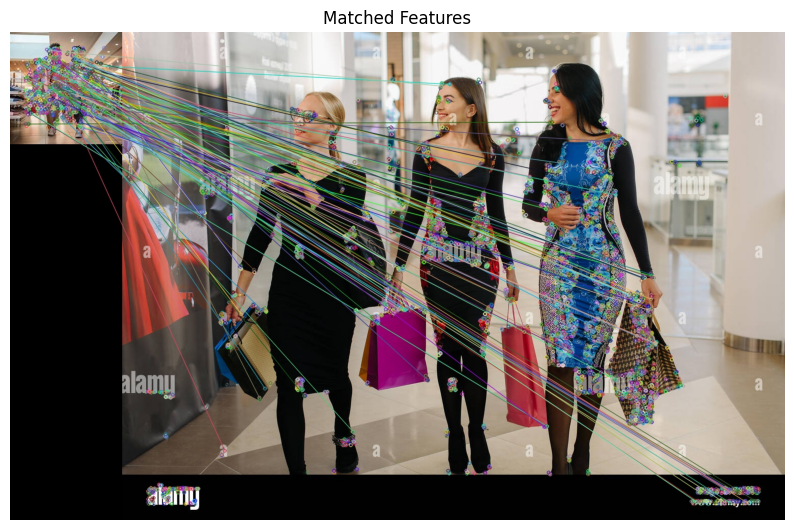

In [ ]:
import matplotlib.pyplot as plt

# Load the saved image
loaded_match_img = cv2.imread("sfm_matches.jpg")

# Convert BGR to RGB for correct display with matplotlib
loaded_match_img_rgb = cv2.cvtColor(loaded_match_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(loaded_match_img_rgb)
plt.title("Matched Features")
plt.axis('off')
plt.show()